In [3]:
import numpy as np #numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.font_manager
from IPython.display import display, HTML # my imports
import matplotlib.font_manager


import pandas as pd
import scipy.signal as signal
import ipywidgets as widgets
from ipywidgets import interact

import pims
import cv2 as cv
import skimage as scikit

import trackpy as tp

from pandas_ods_reader import read_ods #read ods tables

import subprocess # these 2 lines below load OS functionality
import sys
import gc
import json
import warnings

%matplotlib --list
%matplotlib ipympl

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size':12})

print('\npandas version no.:', pd.__version__)

# print progress function
# more elegant (python 3 alternative): print('\rhello', end='',flush=True)
def printp(string):
    sys.stdout.write('\r'+ str(string))
    sys.stdout.flush()


Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']

pandas version no.: 1.5.1


In [2]:
# list available fonts 
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/noto/NotoKufiArabic-Medium.ttf',
 '/usr/share/fonts/TTF/Webdings.TTF',
 '/usr/share/fonts/noto/NotoSansCanadianAboriginal-Bold.ttf',
 '/usr/share/fonts/noto/NotoSerifHebrew-Bold.ttf',
 '/usr/share/fonts/TTF/Inconsolata-CondensedExtraBold.ttf',
 '/usr/share/fonts/adobe-source-sans/SourceSansPro-ExtraLightIt.otf',
 '/usr/share/fonts/gsfonts/URWBookman-DemiItalic.otf',
 '/usr/share/fonts/TTF/Inconsolata-UltraExpandedExtraBold.ttf',
 '/usr/share/fonts/noto/NotoKufiArabic-Bold.ttf',
 '/usr/share/fonts/OTF/FiraSansCompressed-Eight.otf',
 '/usr/share/fonts/OTF/FiraSansCompressed-Book.otf',
 '/usr/share/fonts/noto/NotoSansTamil-Light.ttf',
 '/usr/share/fonts/TTF/trebucbi.ttf',
 '/usr/share/fonts/TTF/Inconsolata-SemiExpandedMedium.ttf',
 '/usr/share/fonts/adobe-source-han-sans/SourceHanSansCN-Normal.otf',
 '/usr/share/fonts/noto/NotoSansArabic-Bold.ttf',
 '/usr/share/fonts/noto/NotoSerifGujarati-Light.ttf',
 '/usr/share/fonts/noto/NotoSansChorasmian-Regular.ttf',
 '/usr/share

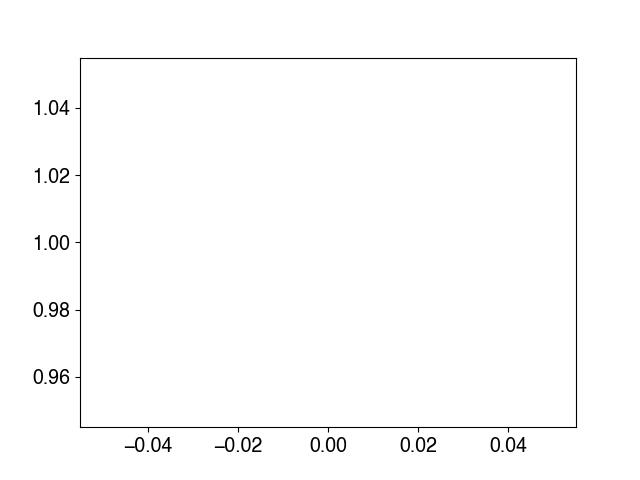

In [2]:
plt.plot(1)

In [4]:
video = pims.Cine('/home/fvega/tesla/thin_layer/kovacs/041022_150Hz_density0.5_step_down_62.5_25.cine')

In [8]:
!ffplay '/home/fvega/tesla/thin_layer/kovacs/041022_150Hz_density0.5_step_down_62.5_25.cine'

ffplay version n5.1.2 Copyright (c) 2003-2022 the FFmpeg developers
  built with gcc 12.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 -

Frame([[194, 196, 193, ..., 155, 162, 156],
       [207, 214, 205, ..., 141, 153, 144],
       [220, 214, 214, ..., 153, 154, 162],
       ...,
       [155, 152, 154, ..., 263, 268, 266],
       [154, 149, 156, ..., 257, 257, 252],
       [154, 160, 145, ..., 243, 246, 244]], dtype=uint16)
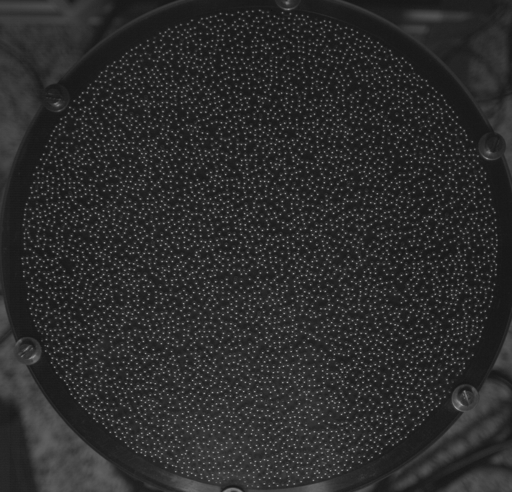

In [6]:
video[0]

In [7]:
video.image_count

38419

In [3]:
datos = pd.read_pickle('/home/fvega/Datos/thin_layer/linked_150Hz_densidad0.5_stepdown_62.5_25.pkl')
datos.head()

,x,y,frame,particle
0,421.738534,16.711356,0,0
3818,133.182416,511.339173,0,1
3817,688.691642,509.790729,0,2
3816,530.393817,510.115225,0,3
3815,439.205483,509.574385,0,4


In [4]:
datos = pd.read_pickle('/home/fvega/Datos/thin_layer/linked_180Hz_densidad0.5_stepdown_62.5_25.pkl')
datos.head()

,x,y,frame,particle
0,446.809849,17.903212,0,0
3788,164.591026,510.689960,0,1
3787,557.198706,510.038409,0,2
3786,545.167494,510.287434,0,3
3785,472.308948,509.634331,0,4


In [ ]:
# change column names
datos.rename(columns ={'x':'x', 'y':'y', 'frame':'frame', 'particle':'track'}, inplace=True)
# reorder so that vels can be calculated
# reset disordered index
datos = datos.sort_values(by=['track','frame']).reset_index(drop=True)
#datos = datos[datos.frame<10000]
#datos  = datos[int(len(datos)*0.40):int(len(datos)*0.60)
# print new 
datos.head()

In [ ]:
# get velocities from track-frame ordered table
#datos = datos[:-1] # delete last state (it has no vel)
# save velocities to table
vx = np.diff(datos.x.values)
vy = np.diff(datos.y.values)
datos = datos[:-1]
datos['vx'] = vx.tolist()
datos['vy'] = vy.tolist()
del vx, vy
gc.collect()
datos.head()

In [7]:
#reorder by time so that temp. evolution can be easily stored
datos = datos.sort_values(by=['frame','track'])
datos.head()
Nframes = np.max(datos.frame.values) # no. of frames
# keep only each Deltat alternate states
Deltat = 20
datos = datos[datos['frame'].isin(np.arange(0,Nframes,Deltat))]
datos.head()

,x,y,frame,track,vx,vy
0,421.738534,16.711356,0,0,0.038882,-0.023463
411,133.182416,511.339173,0,1,-0.277752,-0.152828
2418,688.691642,509.790729,0,2,0.128512,0.231224
14931,530.393817,510.115225,0,3,0.339732,0.123412
53346,439.205483,509.574385,0,4,-0.119435,0.121706


In [8]:
datos.head()

,x,y,frame,particle,vx,vy
0,421.738534,16.711356,0,0,-288.556118,494.627817
3818,133.182416,511.339173,0,1,555.509226,-1.548444
3817,688.691642,509.790729,0,2,-158.297825,0.324497
3816,530.393817,510.115225,0,3,-91.188334,-0.540841
3815,439.205483,509.574385,0,4,-93.878398,0.179883


In [9]:
# build the particle kinetic energy lists for each time that was kept
timelist = np.unique(datos.frame.values)
nt = int(len(timelist))-1
v2list = [[] for i in range(nt)]
for t in range(nt):
    v2list[t] = datos[datos.frame==timelist[t]].vx.values**2 + datos[datos.frame==timelist[t]].vy.values**2
    if t%10==0:
        printp('t= ' + str(t) + ' of ' + str(nt))

t= 1910 of 1920

In [10]:
v2 = np.zeros(nt)
for t in range(nt-1):
    v2list[t] = v2list[t][v2list[t]<0.8]
    v2[t] = np.mean(v2list[t])
    if t%10==0:
        printp('t= ' + str(t) + ' of ' + str(nt))

t= 1910 of 1920

# Plots for Frequency 150 Hz

### Plots for kinetic energy lists at given times

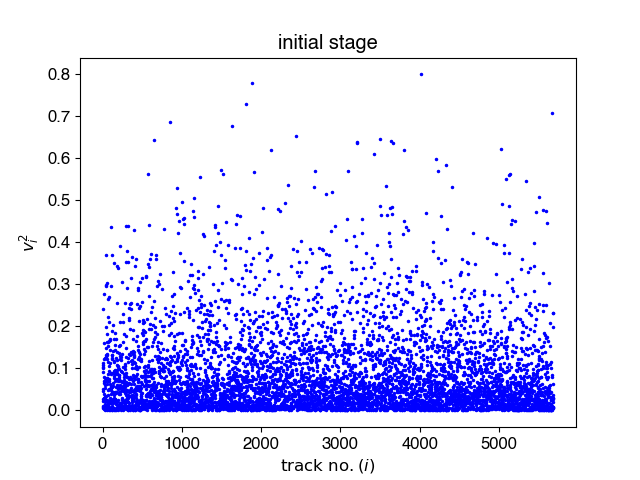

In [73]:
# initial stage
plt.figure(1)
plt.xlabel(r'$\mathrm{track~no.} (i)$')
plt.ylabel(r'$v_i^2$')
plt.title('initial stage')
plt.plot(v2list[10],'.', color='b', markersize=3)
plt.savefig('initial_stage_150Hz.eps',bbox_inches='tight')


In [74]:
plt.close(1)

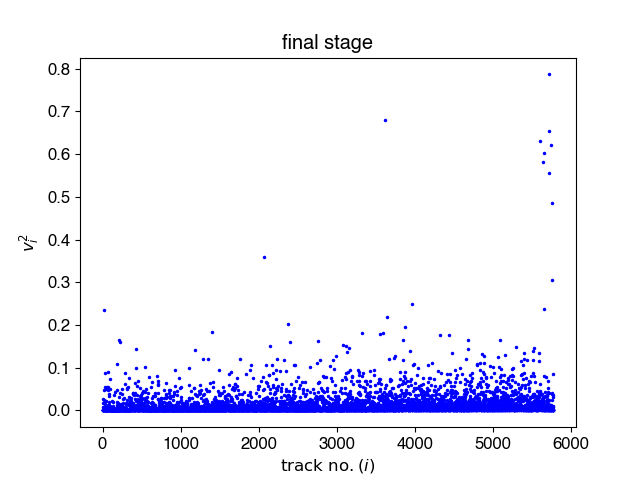

In [77]:
# initial stage
plt.figure(2)
plt.xlabel(r'$\mathrm{track~no.} (i)$')
plt.ylabel(r'$v_i^2$')
plt.title('final stage')
plt.plot(v2list[-10],'.', color='b', markersize=3)
plt.savefig('final_stage_150Hz.eps',bbox_inches='tight')

In [78]:
plt.close(2)

In [83]:
!gv v2t_150Hz.eps

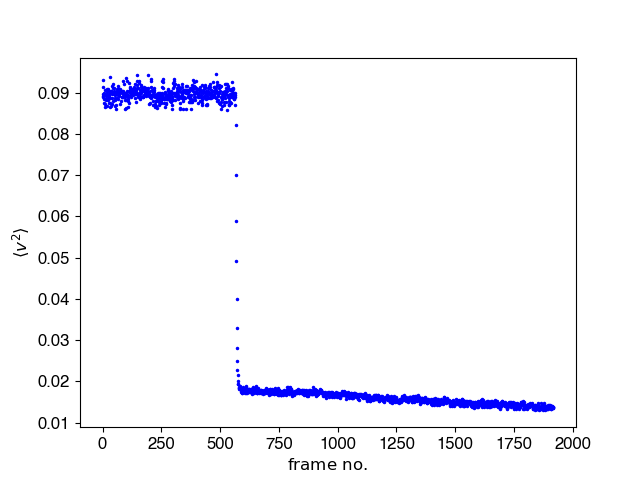

In [82]:
plt.figure(3)
plt.xlabel(r'$\mathrm{frame~no.}}$')
plt.ylabel(r'$\langle v^2\rangle$')
plt.plot(v2[:-1],'.',c='b', markersize=3)
plt.savefig('v2t_150Hz.eps', bbox_inches='tight')

In [81]:
plt.close(3)

# Plots for Frequency 180 Hz

### Plots for kinetic energy lists at given times

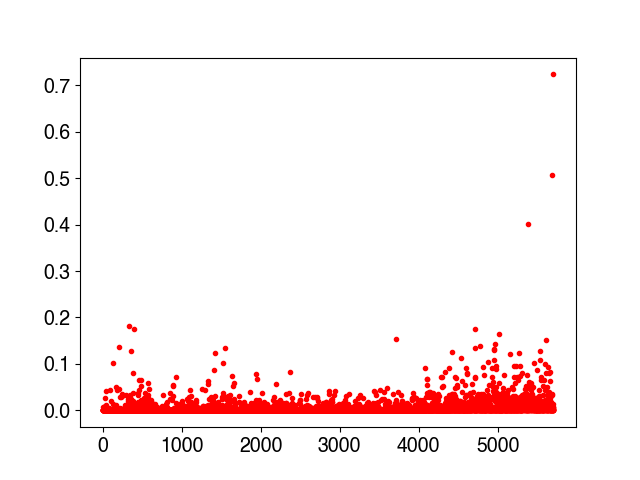

In [15]:
# Frewurncy 150 Hz
plt.figure()
plt.plot(v2list[1800],'.',color='r')

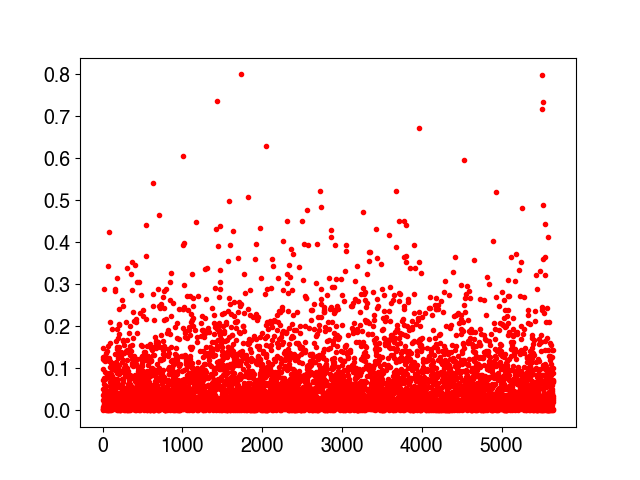

In [17]:
plt.figure()
plt.plot(v2list[10], '.', color='r')

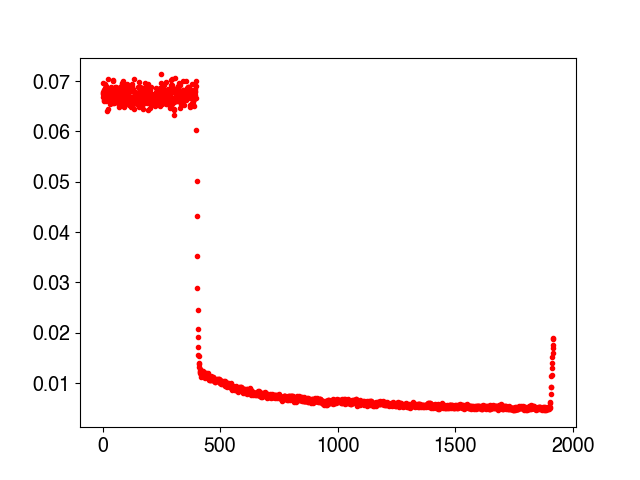

In [13]:
plt.figure()
plt.plot(v2[:-1],'.',c='r')

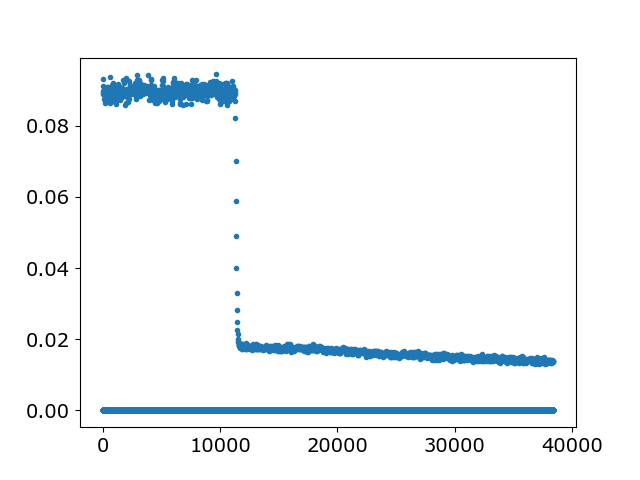

In [26]:
plt.figure()
plt.plot(v2[tmin:tmax-1],'.')

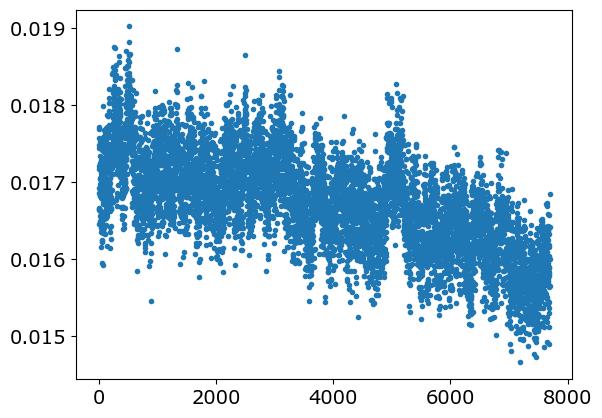

In [90]:
plt.plot(v2[tmin:tmax-1],'.')

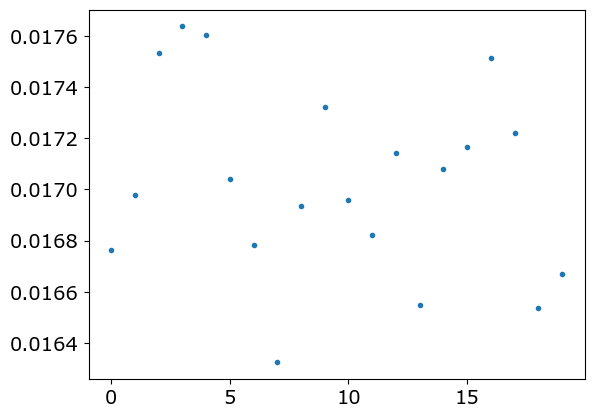

In [94]:
plt.plot(v2[tmin+100:tmin+120],'.')

In [37]:
import gc
del(datos)
gc.collect()

NameError: name 'datos' is not defined

In [45]:
t=100
if t%51:
    print('hola\n')

hola



In [54]:
datos[datos.frame==tmin+2].vx.values**2 + datos[datos.frame==tmin+2].vx.values**2

array([2.34122180e-02, 3.31882742e-02, 2.55571862e-01, ...,
       7.38158457e+04, 1.56493307e-02, 1.29635982e-02])

In [ ]:
np.select(v2list[tmin]

In [80]:
x = np.arange(6)
condlist = [x<5,x>3]
choicelist = [x, x]

np.select(condlist, choicelist, 42)

array([0, 1, 2, 3, 4, 5])

In [82]:
v2list[tmin][v2list[tmin]<1]

array([3.64090181e-03, 2.59969338e-03, 5.90772819e-03, ...,
       7.31394817e-01, 2.65928328e-04, 4.01622794e-01])